In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
train=pd.read_csv('train.csv',thousands=',')
test=pd.read_csv('test.csv',thousands=',')
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


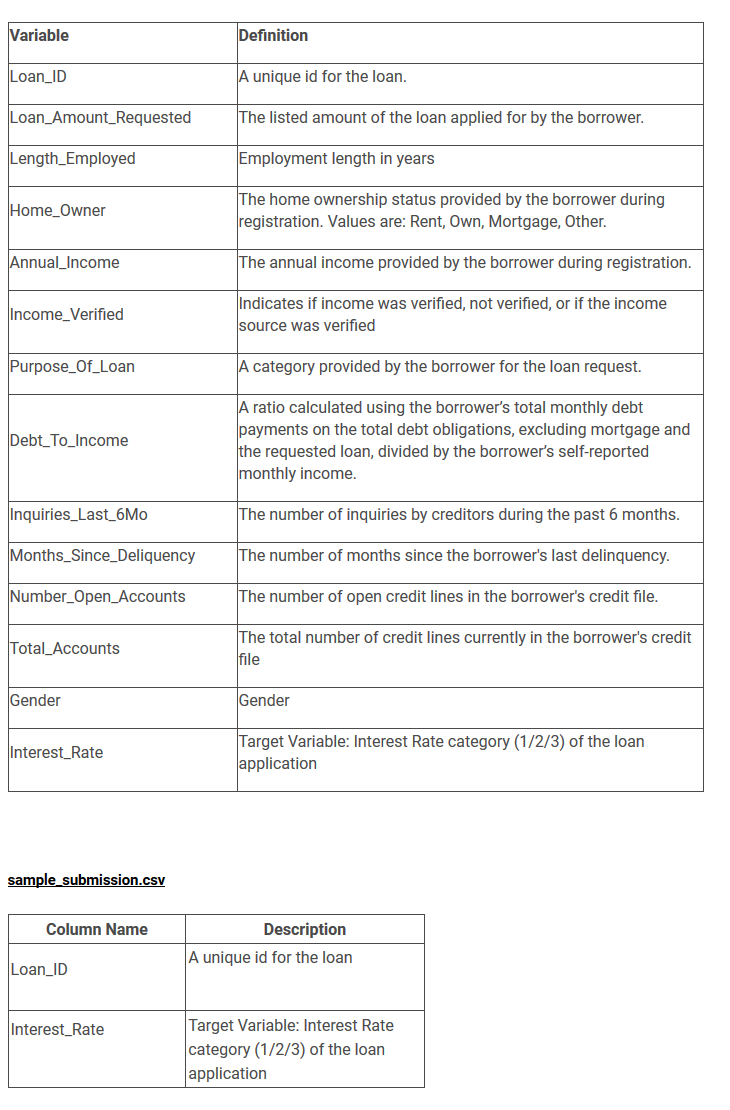

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null int64
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 17.6+ MB


In [3]:
train.describe()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,164309.00000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,8281.86870,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,500.00000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,8000.00000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,12075.00000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,20000.00000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,35000.00000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


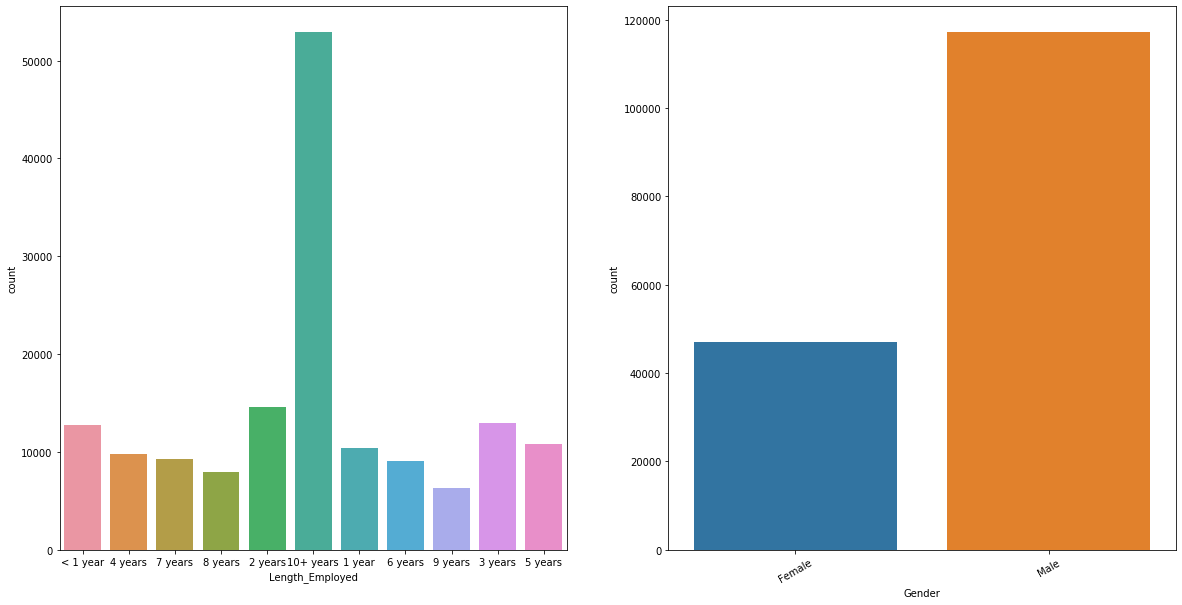

In [4]:
import seaborn as sns
fig, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(train['Length_Employed'],ax=ax[0])
plt.xticks(rotation=30)
sns.countplot(train['Gender'],ax=ax[1])

In [5]:
data=[train,test]
for dataset in data:
    dataset['Gender']=dataset['Gender'].map({'Female':0,'Male':1})

In [6]:
data=[train,test]
for dataset in data: 
    dataset['Length_Employed']=dataset['Length_Employed'].map({'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 year':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10})

In [7]:
data=[train,test]
for dataset in data:
    dataset['Length_Employed']=dataset['Length_Employed'].fillna(dataset['Length_Employed'].mode())

In [8]:
train['Home_Owner'].groupby(train['Home_Owner']).count()

Home_Owner
Mortgage    70345
None           10
Other          49
Own         12525
Rent        56031
Name: Home_Owner, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

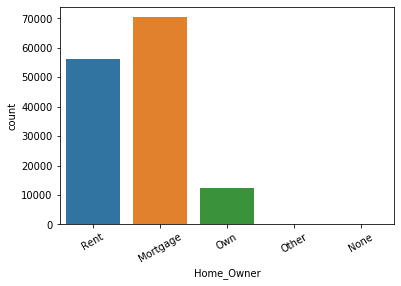

In [9]:
sns.countplot(train['Home_Owner'])
plt.xticks(rotation=30)

In [10]:
med_homeown=train['Home_Owner'].mode()
med_homeown

0    Mortgage
dtype: object

In [11]:
data=[train,test]
for dataset in data:
    dataset['Home_Owner']=dataset['Home_Owner'].map({'Rent':0,'Own':1,'Mortgage':2,'Other':3})
    dataset['Home_Owner']=dataset['Home_Owner'].fillna(2)

In [12]:
train['Home_Owner']

0         0.0
1         2.0
2         2.0
3         2.0
4         1.0
         ... 
164304    0.0
164305    1.0
164306    2.0
164307    0.0
164308    0.0
Name: Home_Owner, Length: 164309, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

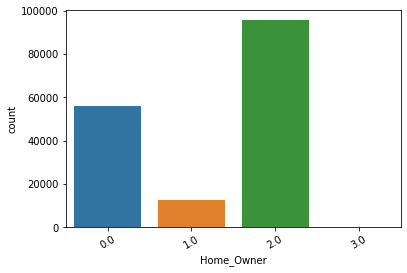

In [13]:
sns.countplot(train['Home_Owner'])
plt.xticks(rotation=30)

In [14]:
train['Annual_Income'].isnull().value_counts()

False    139207
True      25102
Name: Annual_Income, dtype: int64

In [15]:
train['Annual_Income']=train['Annual_Income'].fillna(train['Annual_Income'].median())

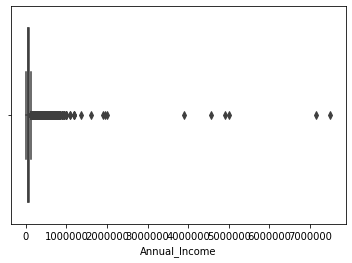

In [16]:
sns.boxplot(train['Annual_Income'])

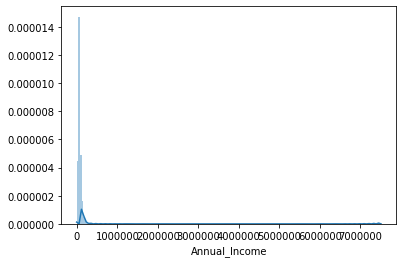

In [17]:
sns.distplot(train['Annual_Income'],hist=True,bins=200)

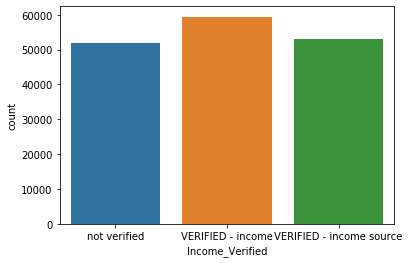

In [18]:
sns.countplot(train['Income_Verified'])

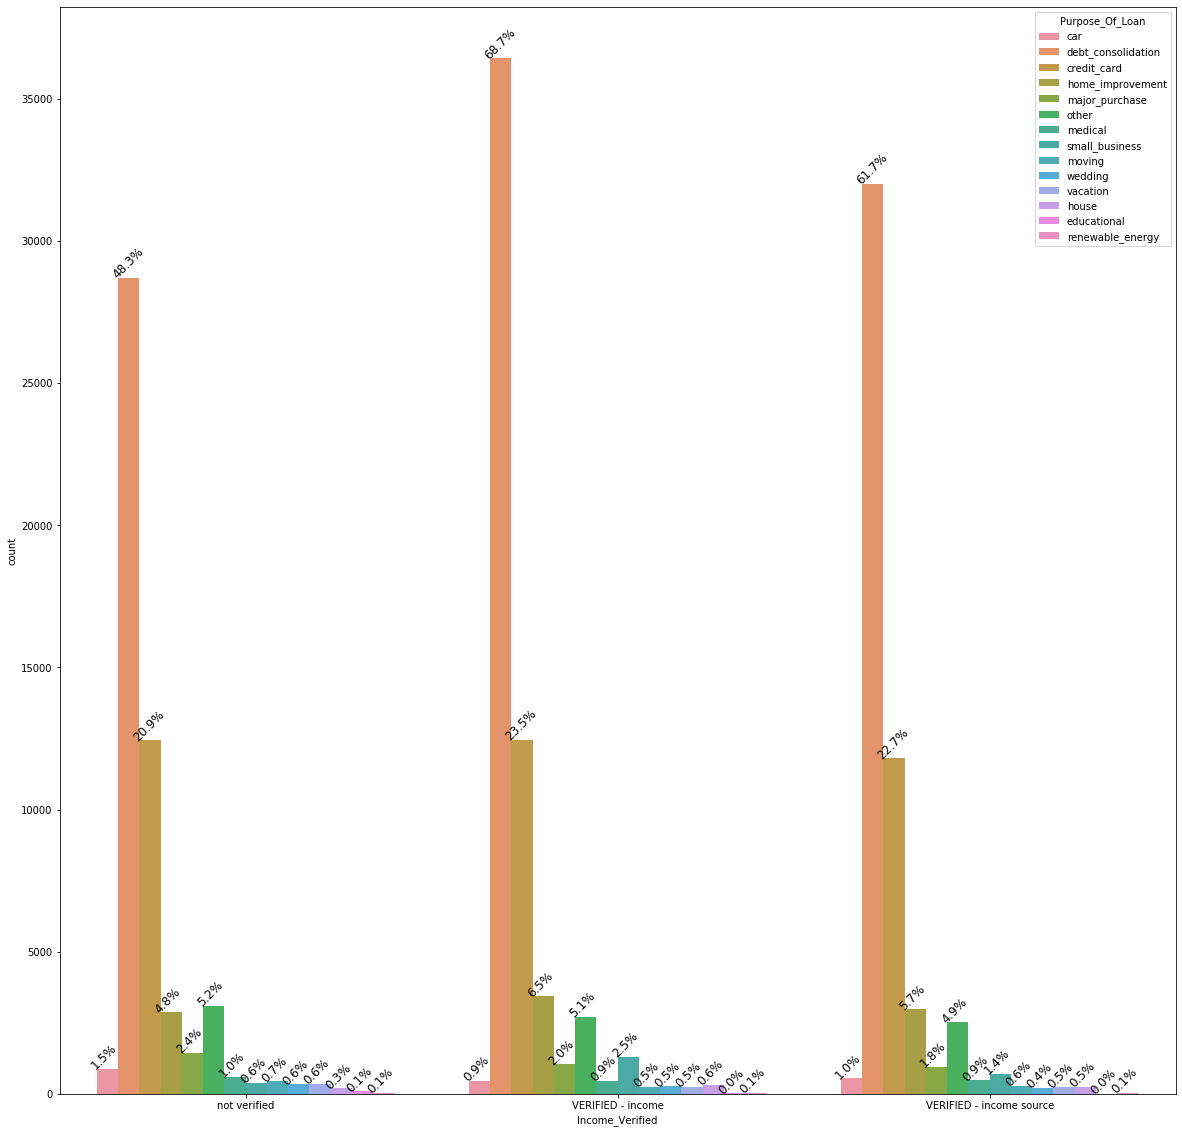

In [19]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2-0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12,rotation=45)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
plt.figure(figsize=(20,20))
ax=sns.countplot(train['Income_Verified'],hue=train['Purpose_Of_Loan'])
with_hue(ax, train.Income_Verified,3,14)

In [20]:
from  sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data=[train,test]
for dataset in data:
    dataset['Income_Verified'] = l.fit_transform(dataset['Income_Verified'])
    dataset['Purpose_Of_Loan'] = l.fit_transform(dataset['Purpose_Of_Loan'])

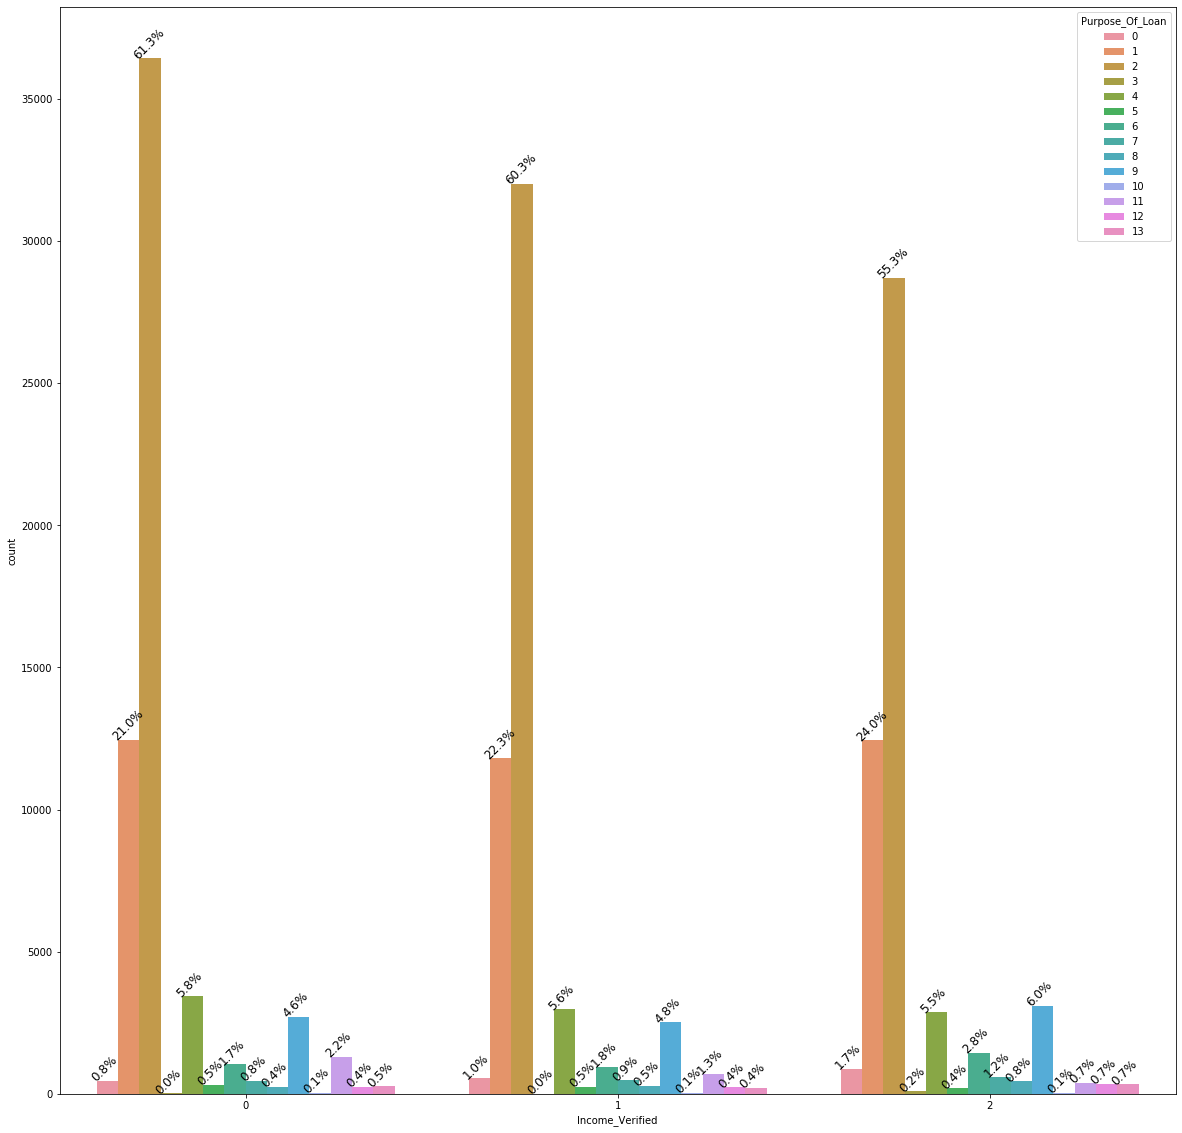

In [21]:
plt.figure(figsize=(20,20))
ax=sns.countplot(train['Income_Verified'],hue=train['Purpose_Of_Loan'])
with_hue(ax, train.Income_Verified,3,14)

In [22]:
def distribusi(kolom,data):
    skewness = data.loc[:,kolom].skew()
    print("Kolom {} mempunyai skewness {}.".format(kolom,skewness))
    sns.set(style="ticks")
    f, (ax_box,ax_hist) = plt.subplots(2,sharex=True, figsize=(15,6),
                                      gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_box, color='r').set_xlabel('')
    sns.distplot(data.loc[~data.loc[:,kolom].isna(),kolom], ax=ax_hist, color='b')
    
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True);

In [23]:
train['Months_Since_Deliquency'].isnull().value_counts()

True     88379
False    75930
Name: Months_Since_Deliquency, dtype: int64

In [24]:
train=train.drop('Months_Since_Deliquency',axis=1)

In [25]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,0.0,0.0,68000.0,2,0,18.37,0,9,14,0,1
1,10000002,30000,NaN,2.0,63000.0,0,2,14.93,0,12,24,0,3
2,10000003,24725,7.0,2.0,75566.4,1,2,15.88,0,12,16,1,3
3,10000004,16000,0.0,2.0,56160.0,1,2,14.34,3,16,22,1,3
4,10000005,17000,8.0,1.0,96000.0,1,2,22.17,1,19,30,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725,10.0,0.0,63000.0,1,1,13.56,0,13,16,1,2
164305,10164306,6000,8.0,1.0,63000.0,1,11,9.12,0,13,30,1,2
164306,10164307,20250,10.0,2.0,63000.0,0,1,18.17,1,17,30,1,1
164307,10164308,10000,NaN,0.0,63000.0,2,6,18.75,1,16,62,0,3


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
Loan_ID                  164309 non-null int64
Loan_Amount_Requested    164309 non-null int64
Length_Employed          164309 non-null float64
Home_Owner               164309 non-null float64
Annual_Income            164309 non-null float64
Income_Verified          164309 non-null int32
Purpose_Of_Loan          164309 non-null int32
Debt_To_Income           164309 non-null float64
Inquiries_Last_6Mo       164309 non-null int64
Number_Open_Accounts     164309 non-null int64
Total_Accounts           164309 non-null int64
Gender                   164309 non-null int64
Interest_Rate            164309 non-null int64
dtypes: float64(4), int32(2), int64(7)
memory usage: 15.0 MB


In [26]:
trainbackup=train
testbackup=test

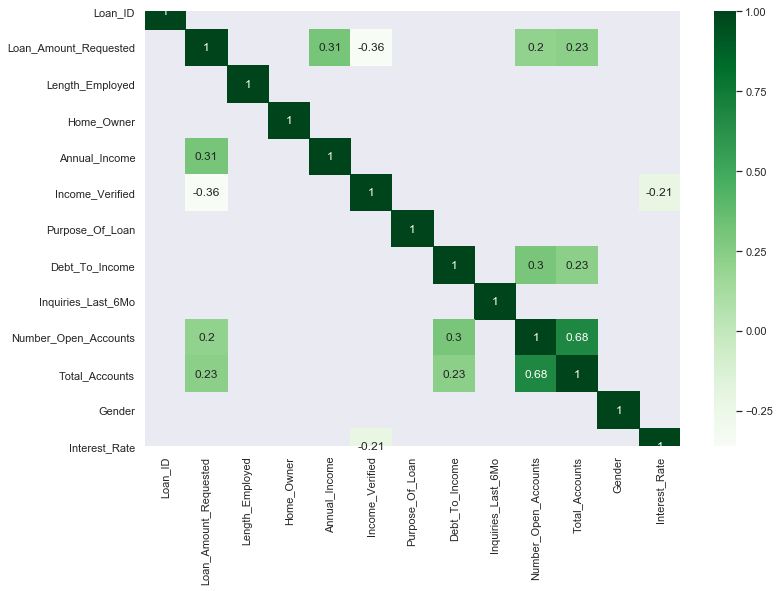

In [27]:
sns.set(rc={'figure.figsize':(20,8)});
corr = train.corr()
kot = corr[(corr>=.2) | (corr<=-0.2)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens",annot=True)
plt.show()

In [28]:
#Correlation with output variable
cor_target = abs(corr["Interest_Rate"])#Selecting highly correlated features
relevant_features = cor_target[(cor_target>0.1)|(cor_target<-0.1)]
relevant_features

Loan_Amount_Requested    0.132486
Income_Verified          0.213371
Purpose_Of_Loan          0.107253
Debt_To_Income           0.152472
Inquiries_Last_6Mo       0.188987
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [49]:
feature=train[['Loan_Amount_Requested','Income_Verified','Purpose_Of_Loan','Inquiries_Last_6Mo']]

In [50]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 4 columns):
Loan_Amount_Requested    164309 non-null int64
Income_Verified          164309 non-null int32
Purpose_Of_Loan          164309 non-null int32
Inquiries_Last_6Mo       164309 non-null int64
dtypes: int32(2), int64(2)
memory usage: 3.8 MB


In [51]:
feature.isnull().count()

Loan_Amount_Requested    164309
Income_Verified          164309
Purpose_Of_Loan          164309
Inquiries_Last_6Mo       164309
dtype: int64

In [52]:
from sklearn.model_selection import StratifiedKFold,KFold
K = 5
skf = StratifiedKFold(n_splits = K, random_state = 7, shuffle = True)

In [53]:
feature=feature.columns.tolist()
feature

['Loan_Amount_Requested',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Inquiries_Last_6Mo']

In [ ]:
y_valid_pred = 0*y
y_test_pred = 0
accuracy = 0
result={}
#fitting catboost classifier model
j=1
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=1000,verbose=False,learning_rate=0.1)
for train_index, test_index in skf.split(X, y):  
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:], X.iloc[test_index,:]
    print( "\nFold ", j)
    
    # Run model for this fold
    fit_model = model.fit( X_train, y_train, eval_set=(X_valid, y_valid),cat_features=feature, use_best_model=True)
    print( "  N trees = ", model.tree_count_ )
        
    # Generate validation predictions for this fold
    pred = fit_model.predict(X_valid)
    y_valid_pred.iloc[test_index] = pred.reshape(-1)
    print(accuracy_score(y_valid,pred))
    accuracy+=accuracy_score(y_valid,pred)
    # Accumulate test set predictions
    y_test_pred += fit_model.predict(X_test)
    result[j]=fit_model.predict(X_test)
    j+=1
results = y_test_pred / K  # Average test set predictions
print(accuracy/5)


Fold  1


In [ ]:
prediction = pd.DataFrame()
for i in range(1, 6):
    prediction = pd.concat([prediction,pd.DataFrame(result[i])],axis=1)
prediction.columns=['Split1','Split2','Split3','Split4','Split5']

submission.Interest_Rate=prediction.mode(axis=1)[0]
submission.to_csv('CatBoost.csv',index = False)

In [ ]:
#from imblearn.over_sampling import SMOTE
# creating object for smote 
# sm = SMOTE(random_state=103)
#sm=SMOTE(k_neighbors=3)
#X_train_res, y_train_res = sm.fit_sample(X_train ,y_train.ravel())
#print(X_train_res.shape,y_train_res.shape)

# # Success
# print ("Training and testing split was successful.")

In [ ]:
#!pip install lightgbm
#from lightgbm import LGBMClassifier
#lg=LGBMClassifier(boosting_type='gbdt', max_depth=14, learning_rate=0.14, objective='multiclass', reg_alpha=0,
                  #reg_lambda=1, n_jobs=-1, random_state=100, n_estimators=600)



In [ ]:
#model=lg.fit(X_train_res,y_train_res)
#pred=model.predict(X_test)